In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import numpy as np
import cv2
import zipfile
import os
import datetime
from glob import glob

In [3]:
with zipfile.ZipFile('/content/drive/MyDrive/archive (7).zip','r') as zip_file:
  zip_file.extractall('')

In [4]:
from google.colab.patches import cv2_imshow

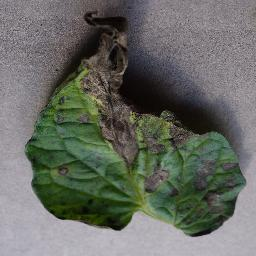

In [5]:
img = cv2.imread("/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight/0034a551-9512-44e5-ba6c-827f85ecc688___RS_Erly.B 9432.JPG")
cv2_imshow(img)

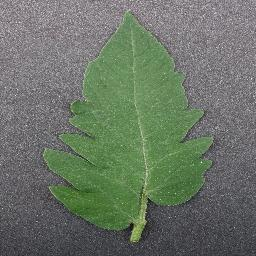

In [6]:
img = cv2.imread('/content/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG')
cv2_imshow(img)


In [7]:
os.listdir('/content/New Plant Diseases Dataset(Augmented)')

['train', 'valid']

In [8]:
os.listdir('/content/New Plant Diseases Dataset(Augmented)/train')

['Tomato___Septoria_leaf_spot',
 'Tomato___Late_blight',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___healthy',
 'Tomato___Early_blight',
 'Tomato___Bacterial_spot',
 'Tomato___Leaf_Mold',
 'Tomato___Tomato_mosaic_virus']

In [9]:
train_path = '/content/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/New Plant Diseases Dataset(Augmented)/valid'

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [13]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [14]:
data = glob('/content/New Plant Diseases Dataset(Augmented)/train/*')

In [15]:
data


['/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus']

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten,BatchNormalization
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras import optimizers

In [17]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [18]:
#loading vgg16 model trained on imagenet data and we are not including top layer 
img_size = [224,224]
vgg = VGG16(input_shape=img_size+ [3], weights='imagenet', include_top=False)
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

# #Conv Layer
# FCConv1 = Conv2D(filters=4096,kernel_size=(7,7),strides=(1,1),padding='valid',data_format='channels_last',
#               activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0))(vgg.output)

# FCConv2 = Conv2D(filters=4096,kernel_size=(1,1),strides=(1,1),padding='valid',data_format='channels_last',
#               activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30))(FCConv1)
#Flatten
flatten = Flatten(data_format='channels_last',name='Flatten')(vgg.output)
# Dense1= Dense(128,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(flatten)              
# #output layer
# drop1 =Dropout(0.25)(flatten)
# batch_norm1 = BatchNormalization()(drop1)  
# Dense2 = Dense(50,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(batch_norm1)
# drop2 =  Dropout(0.25)(Dense2)
# batch_norm2   = BatchNormalization()(drop2)
Output = Dense(units=len(data),activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(flatten)

# create a model object
model_1= Model(inputs=vgg.input, outputs=Output)

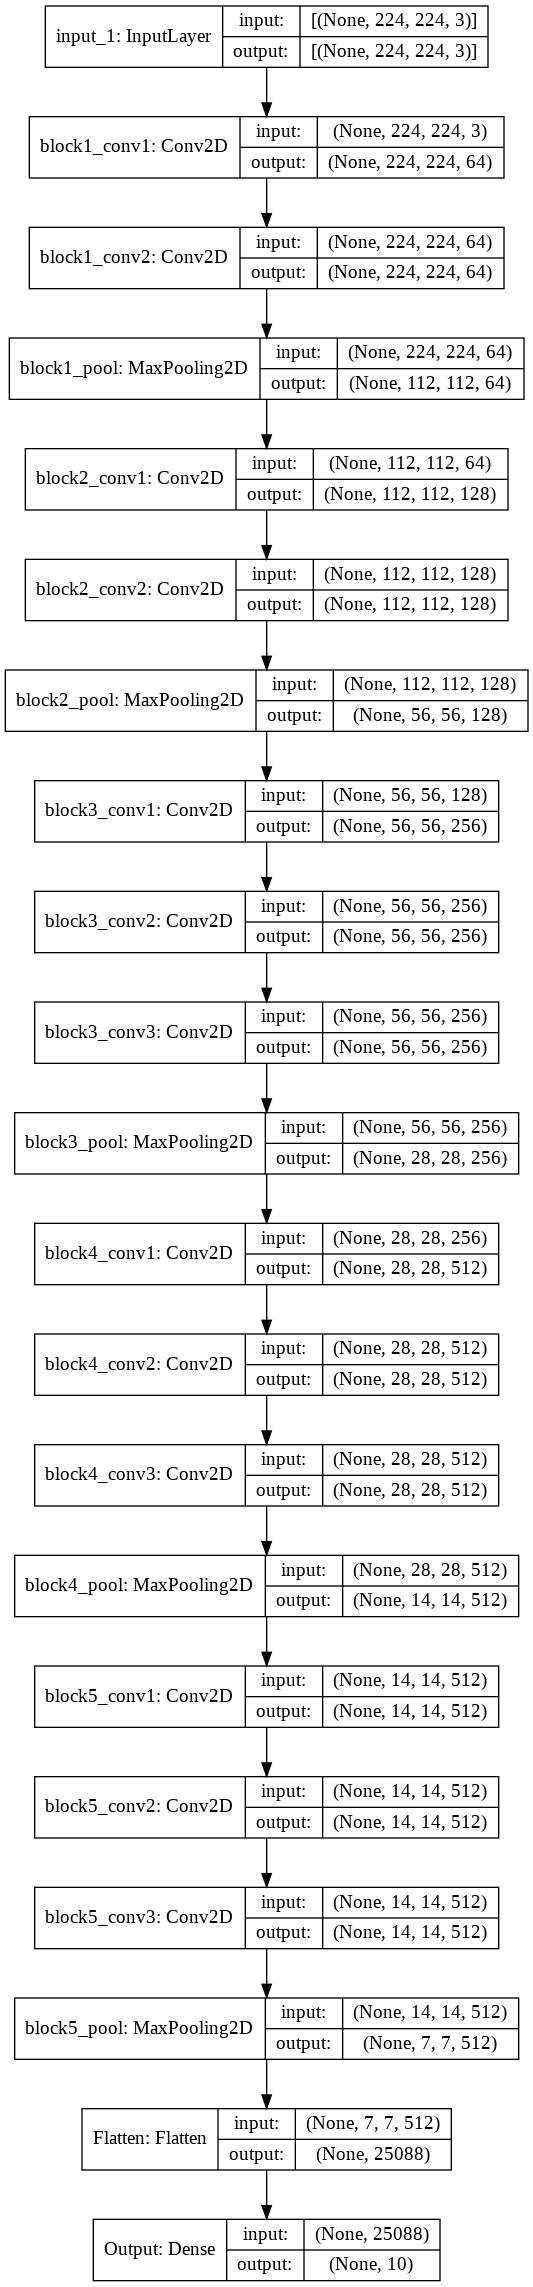

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, 'model_1.png', show_shapes=True)

In [20]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

In [22]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_vgg16.h5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history.log')

In [23]:
result_1 =  model_1.fit(training_set,
                        validation_data = test_set,
                        epochs = 10,
                        steps_per_epoch=len(training_set),
                        validation_steps=len(test_set),
                        callbacks = [csv_logger,checkpointer])

Epoch 1/10
574/574 [==============================] - 317s 530ms/step - loss: 1.1182 - accuracy: 0.6516 - val_loss: 0.6675 - val_accuracy: 0.7858

Epoch 00001: val_loss improved from inf to 0.66754, saving model to best_model_vgg16.h5
Epoch 2/10
574/574 [==============================] - 297s 518ms/step - loss: 0.4153 - accuracy: 0.8587 - val_loss: 0.3815 - val_accuracy: 0.8704

Epoch 00002: val_loss improved from 0.66754 to 0.38148, saving model to best_model_vgg16.h5
Epoch 3/10
574/574 [==============================] - 299s 521ms/step - loss: 0.3466 - accuracy: 0.8790 - val_loss: 0.3956 - val_accuracy: 0.8661

Epoch 00003: val_loss did not improve from 0.38148
Epoch 4/10
574/574 [==============================] - 302s 527ms/step - loss: 0.2801 - accuracy: 0.9055 - val_loss: 0.4389 - val_accuracy: 0.8547

Epoch 00004: val_loss did not improve from 0.38148
Epoch 5/10
574/574 [==============================] - 302s 526ms/step - loss: 0.2655 - accuracy: 0.9104 - val_loss: 0.4787 - val_a

In [24]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [25]:
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=img_size + [3], weights='imagenet', include_top=False)
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False
    # #Conv Layer
# FCConv1 = Conv2D(filters=4096,kernel_size=(7,7),strides=(1,1),padding='valid',data_format='channels_last',
#               activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0))(vgg.output)

# FCConv2 = Conv2D(filters=4096,kernel_size=(1,1),strides=(1,1),padding='valid',data_format='channels_last',
#               activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30))(FCConv1)
#Flatten
flatten = Flatten(data_format='channels_last',name='Flatten')(inception.output)
# Dense1= Dense(128,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(flatten)              
# #output layer
# drop1 =Dropout(0.25)(flatten)
# batch_norm1 = BatchNormalization()(drop1)  
# Dense2 = Dense(50,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(batch_norm1)
# drop2 =  Dropout(0.25)(Dense2)
# batch_norm2   = BatchNormalization()(drop2)
Output = Dense(units=len(data),activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(flatten)

# create a model object
model_2 = Model(inputs=inception.input, outputs=Output)

In [26]:
plot_model(model_2, 'model_2.png', show_shapes=True)

In [27]:
model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [28]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_inception.h5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history.log')

In [29]:
result_2 =  model_2.fit(training_set,
                        validation_data = test_set,
                        epochs = 10,
                        steps_per_epoch=len(training_set),
                        validation_steps=len(test_set),
                        callbacks = [csv_logger,checkpointer])

Epoch 1/10
574/574 [==============================] - 286s 486ms/step - loss: 4.4508 - accuracy: 0.5877 - val_loss: 2.3404 - val_accuracy: 0.7625

Epoch 00001: val_loss improved from inf to 2.34040, saving model to best_model_inception.h5
Epoch 2/10
574/574 [==============================] - 277s 483ms/step - loss: 2.0181 - accuracy: 0.7889 - val_loss: 2.4859 - val_accuracy: 0.7897

Epoch 00002: val_loss did not improve from 2.34040
Epoch 3/10
574/574 [==============================] - 273s 476ms/step - loss: 2.0292 - accuracy: 0.8219 - val_loss: 2.1943 - val_accuracy: 0.8129

Epoch 00003: val_loss improved from 2.34040 to 2.19434, saving model to best_model_inception.h5
Epoch 4/10
574/574 [==============================] - 274s 477ms/step - loss: 1.8262 - accuracy: 0.8429 - val_loss: 3.3937 - val_accuracy: 0.7780

Epoch 00004: val_loss did not improve from 2.19434
Epoch 5/10
574/574 [==============================] - 276s 480ms/step - loss: 1.7432 - accuracy: 0.8602 - val_loss: 2.7202